In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

In [2]:
price = [5, 10, 15, 17, 20, 23, 25]
demand = [600, 550, 700, 680, 500, 400, 250]
df = pd.DataFrame({'price': price, 'demand': demand})
threshold = df['demand'].median()
df['high_demand'] = (df['demand'] > threshold).astype(int)
df

,price,demand,high_demand
0,5,600,1
1,10,550,0
2,15,700,1
3,17,680,1
4,20,500,0
5,23,400,0
6,25,250,0


In [3]:
model_1 = LinearRegression()
X = df[['price']]
y_1 = df[['demand']]
model_1.fit(X, y_1)

model_2 = LogisticRegression()
y_2 = df[['high_demand']]
model_2.fit(X, y_2)

C:\Users\thanh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [4]:
print(model_1.coef_[0])
print(model_1.intercept_[0])


print(model_2.coef_[0])
print(model_2.intercept_[0])

[-14.64252117]
766.2699905926621
[-0.19837696]
2.917413911387454


In [5]:
#### Linear_regression: Demand = -14.64 * Price + 766.26
#### Logistic_regression: P(high_demand) = 1/ (1 + exp(-(0.94 * Price - 17.72))

In [6]:
current_price = 20
cost = 4

In [7]:
simulation_data = pd.DataFrame({'price': np.linspace(1, 100, 100)})
simulation_data['demand_linreg'] = model_1.coef_[0] * simulation_data['price'] + model_1.intercept_[0]
simulation_data['profit_linreg'] = simulation_data['demand_linreg'] * (simulation_data['price'] - 4)
simulation_data['demand_prob_logreg'] = 1 / (1 + np.exp(-(model_2.coef_[0] * simulation_data['price'] + model_2.intercept_[0])))
simulation_data['profit_logreg'] = simulation_data['demand_prob_logreg'] * (simulation_data['price'] - 4)

In [8]:
simulation_data

,price,demand_linreg,profit_linreg,demand_prob_logreg,profit_logreg
0,1.0,751.627469,-2254.882408,9.381407e-01,-2.814422
1,2.0,736.984948,-1473.969897,9.255775e-01,-1.851155
2,3.0,722.342427,-722.342427,9.107058e-01,-0.910706
3,4.0,707.699906,0.000000,8.932051e-01,0.000000
4,5.0,693.057385,693.057385,8.727537e-01,0.872754
...,...,...,...,...,...
95,96.0,-639.412041,-58825.907808,9.913586e-08,0.000009
96,97.0,-654.054563,-60827.074318,8.129742e-08,0.000008
97,98.0,-668.697084,-62857.525870,6.666882e-08,0.000006
98,99.0,-683.339605,-64917.262465,5.467247e-08,0.000005


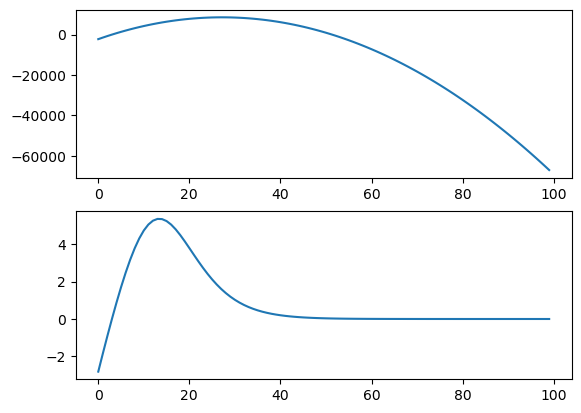

In [9]:
plt.subplot(2, 1, 1)
plt.plot(simulation_data['profit_linreg'])

plt.subplot(2, 1, 2)
plt.plot(simulation_data['profit_logreg'])

plt.show()

In [10]:
print(simulation_data[simulation_data['profit_linreg'] == simulation_data['profit_linreg'].max()])

    price  demand_linreg  profit_linreg  demand_prob_logreg  profit_logreg
27   28.0     356.279398     8550.70555            0.066786       1.602864


In [11]:
print(simulation_data[simulation_data['profit_logreg'] == simulation_data['profit_logreg'].max()])

    price  demand_linreg  profit_linreg  demand_prob_logreg  profit_logreg
13   14.0     561.274694    5612.746943            0.534977       5.349769
